# Project 2: Classification

## Introduction
In this notebook I will be analyzing data about iris flowers in order to build classification models that will predict the species of iris given certain features. The overarching goal is not to analyze the data but more or less to truly understand various classification algorithms and why some may be more successful than others in the current context. 

This will be my first time using SciKit-learn and implementing classification algorithms. 



## Data
As mentioned before, the dataset I am using contains information about three species of iris flowers. It is a single CSV file and was pulled from Kaggle.com and can be found <a href="https://www.kaggle.com/uciml/iris">here</a>. 
Each flower has its length and width of the sepal and petal recorded. There are a total of 150 rows and 6 columns.
1. Id    
2. SepalLengthCm
3. SepalWidthCm 
4. PetalLengthCm
5. PetalWidthCm 
6. Species      

![Iris Flower](sepalpetal.jpg)

In [2]:
# Import needed libraries
import pandas as pd

#read the csv into memory
iris = pd.read_csv("archive/Iris.csv")

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Understanding 
In this section I will explore the dataset and gain a basic understanding of the data through visualizations. 

In [4]:
# Import needed libraries
import seaborn as sns

In [5]:
# gathering some basic information about the dataset
len(iris)

150

In [6]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

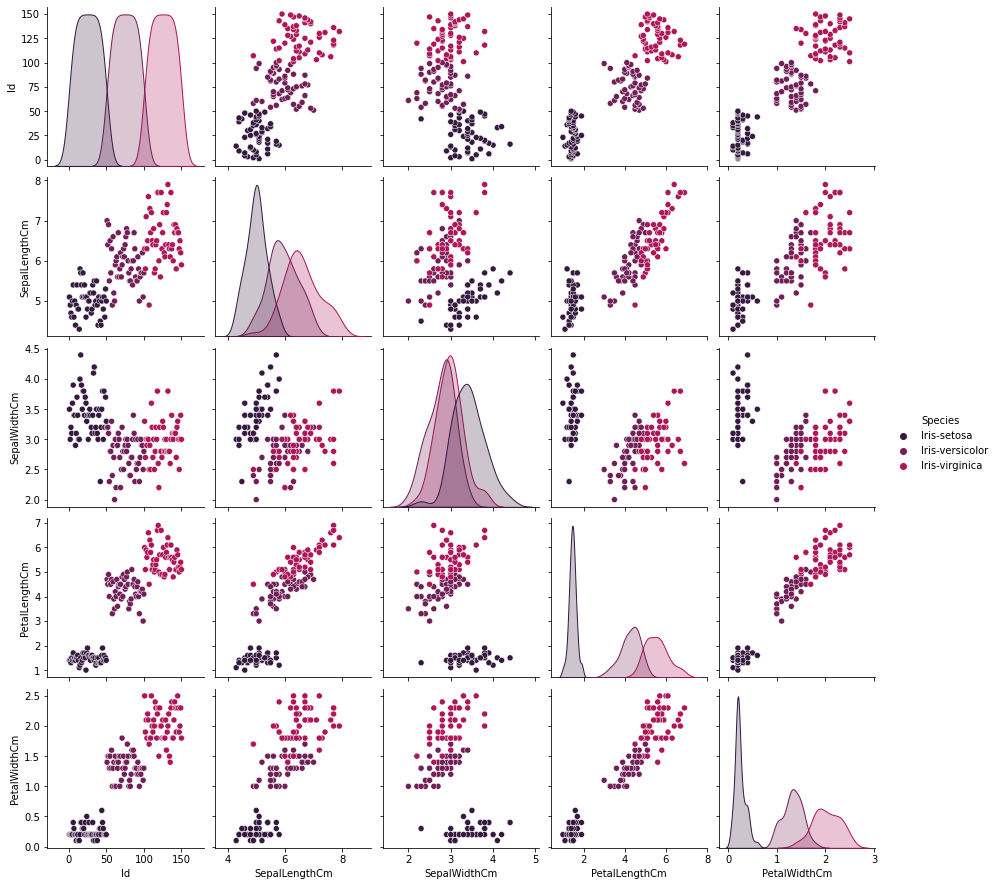

In [9]:
# plots
sns.set_palette('rocket')
sns.pairplot(iris, hue='Species')

[Text(0.5, 1.0, 'Sepal Length Bar Plot')]

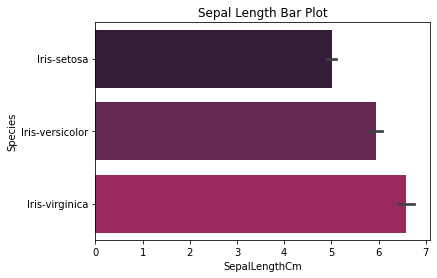

In [10]:
sns.barplot(x='SepalLengthCm', y='Species', data = iris).set(title='Sepal Length Bar Plot')

[Text(0.5, 1.0, 'Sepal Width Bar Plot')]

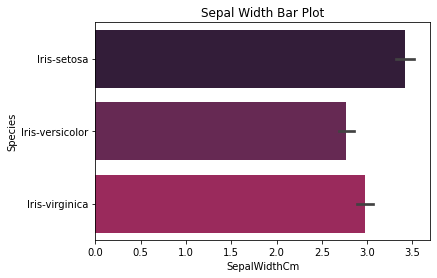

In [11]:
sns.barplot(x='SepalWidthCm', y='Species', data = iris).set(title='Sepal Width Bar Plot')

[Text(0.5, 1.0, 'Petal Length Bar Plot')]

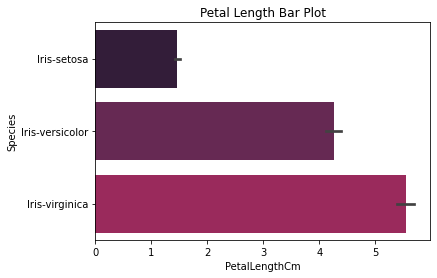

In [12]:
sns.barplot(x='PetalLengthCm', y='Species', data = iris).set(title='Petal Length Bar Plot')

[Text(0.5, 1.0, 'Petal Width Bar Plot')]

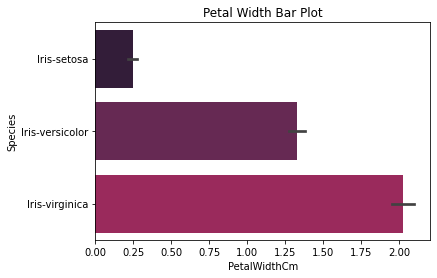

In [13]:
sns.barplot(x='PetalWidthCm', y='Species', data = iris).set(title='Petal Width Bar Plot')

In [14]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


[Text(0.5, 1.0, 'Petal Width Strip Plot')]

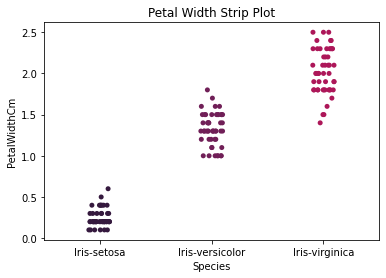

In [15]:
sns.stripplot(x='Species', y='PetalWidthCm', data=iris).set(title='Petal Width Strip Plot')

[Text(0.5, 1.0, 'Petal Length Strip Plot')]

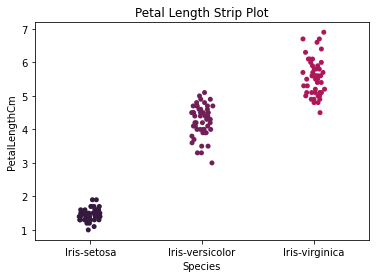

In [16]:
sns.stripplot(x='Species', y='PetalLengthCm', data=iris).set(title='Petal Length Strip Plot')

[Text(0.5, 1.0, 'Sepal Width Strip Plot')]

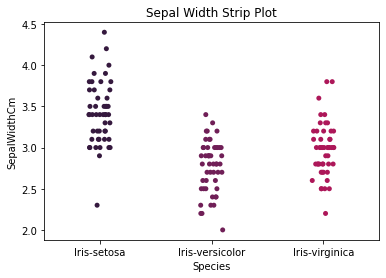

In [17]:
sns.stripplot(x='Species', y='SepalWidthCm', data=iris).set(title='Sepal Width Strip Plot')

[Text(0.5, 1.0, 'Sepal Length Strip Plot')]

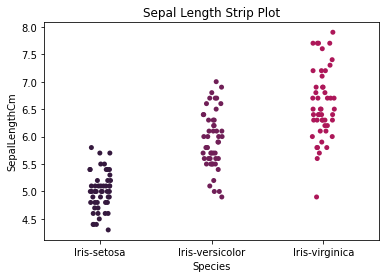

In [18]:
sns.stripplot(x='Species', y='SepalLengthCm', data=iris).set(title='Sepal Length Strip Plot')

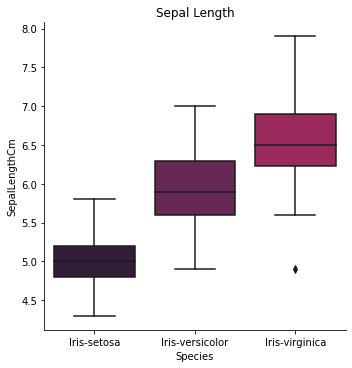

In [19]:
sns.catplot(x='Species', y='SepalLengthCm', kind='box', data=iris).set(title='Sepal Length')

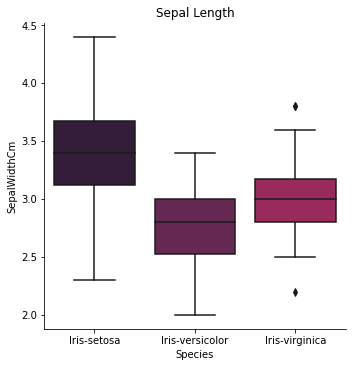

In [20]:
sns.catplot(x='Species', y='SepalWidthCm', kind='box', data=iris).set(title='Sepal Length')

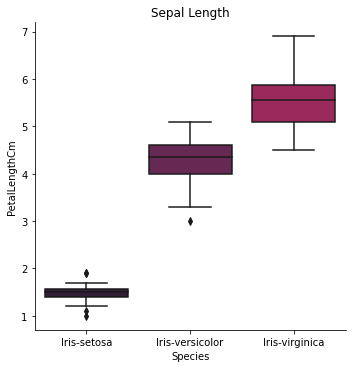

In [21]:
sns.catplot(x='Species', y='PetalLengthCm', kind='box', data=iris).set(title='Sepal Length')

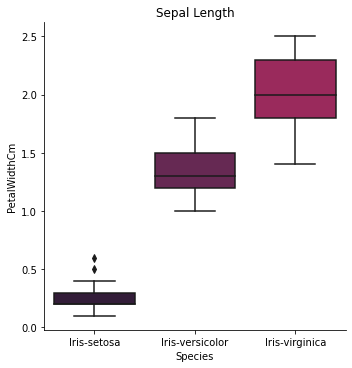

In [22]:
sns.catplot(x='Species', y='PetalWidthCm', kind='box', data=iris).set(title='Sepal Length')

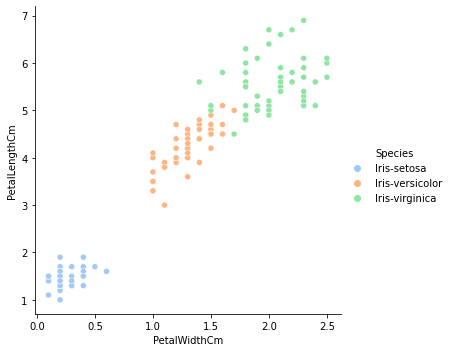

In [23]:
sns.relplot(x='PetalWidthCm', y='PetalLengthCm', hue = 'Species', data = iris, palette = 'pastel')

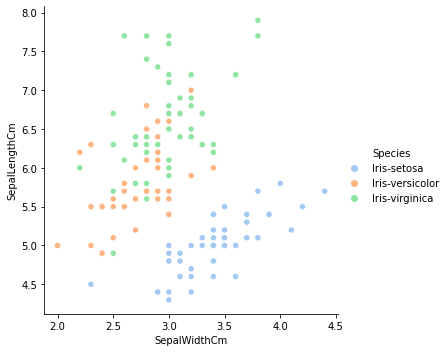

In [24]:
sns.relplot(x='SepalWidthCm', y='SepalLengthCm', hue = 'Species', data = iris, palette = 'pastel')

## Modeling
I will be using a few different classification models for this dataset. 

### Decision Trees - 

Notes: good for creating multiple "boundaries" rather then one single catch all. Shares internal decision-making logic: known as a "whitebox algorithm". 

ex. versicolor and setosa overlap a good deal on their sepal properties

In [25]:
# load scikit learn library
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [26]:
#Convert our target to a numeric value
# Iris-setosa -> 1     
# Iris-versicolor -> 2
# Iris-virginica -> 3
iris['Species'] = pd.factorize(iris['Species'])[0] + 1
iris['Species'].value_counts()
# create our features matrix and our labels
X = iris.drop(["Species", "Id"], axis = 1) #feature matrix aka independent variables
y = iris['Species'] # labels/targets aka dependent variable

In [27]:
#only sepal measurements
iris_sepal = iris.drop(['Id', 'PetalLengthCm', 'PetalWidthCm'], axis = 1)
X_sepal = iris_sepal.drop('Species', axis = 1)
y_sepal = iris_sepal['Species']
X_sepal_train, X_sepal_test, y_sepal_train, y_sepal_test = train_test_split(X_sepal, y_sepal, test_size=0.3)

In [28]:
#only petal measurements
iris_petal = iris.drop(['Id', 'SepalLengthCm', 'SepalWidthCm'], axis = 1)
X_petal = iris_petal.drop('Species', axis = 1)
y_petal = iris_petal['Species']
X_petal_train, X_petal_test, y_petal_train, y_petal_test = train_test_split(X_petal, y_petal, test_size=0.3)

In [29]:
clf = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
clf = clf.fit(X_train, y_train)

In [31]:
names = []
for i in X.columns:
    names.append(i) 
r = export_text(clf, feature_names = names)
print(r)

|--- PetalWidthCm <= 0.80
|   |--- class: 1
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: 3
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 3
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalLengthCm <= 5.95
|   |   |   |   |--- class: 2
|   |   |   |--- SepalLengthCm >  5.95
|   |   |   |   |--- class: 3
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 3



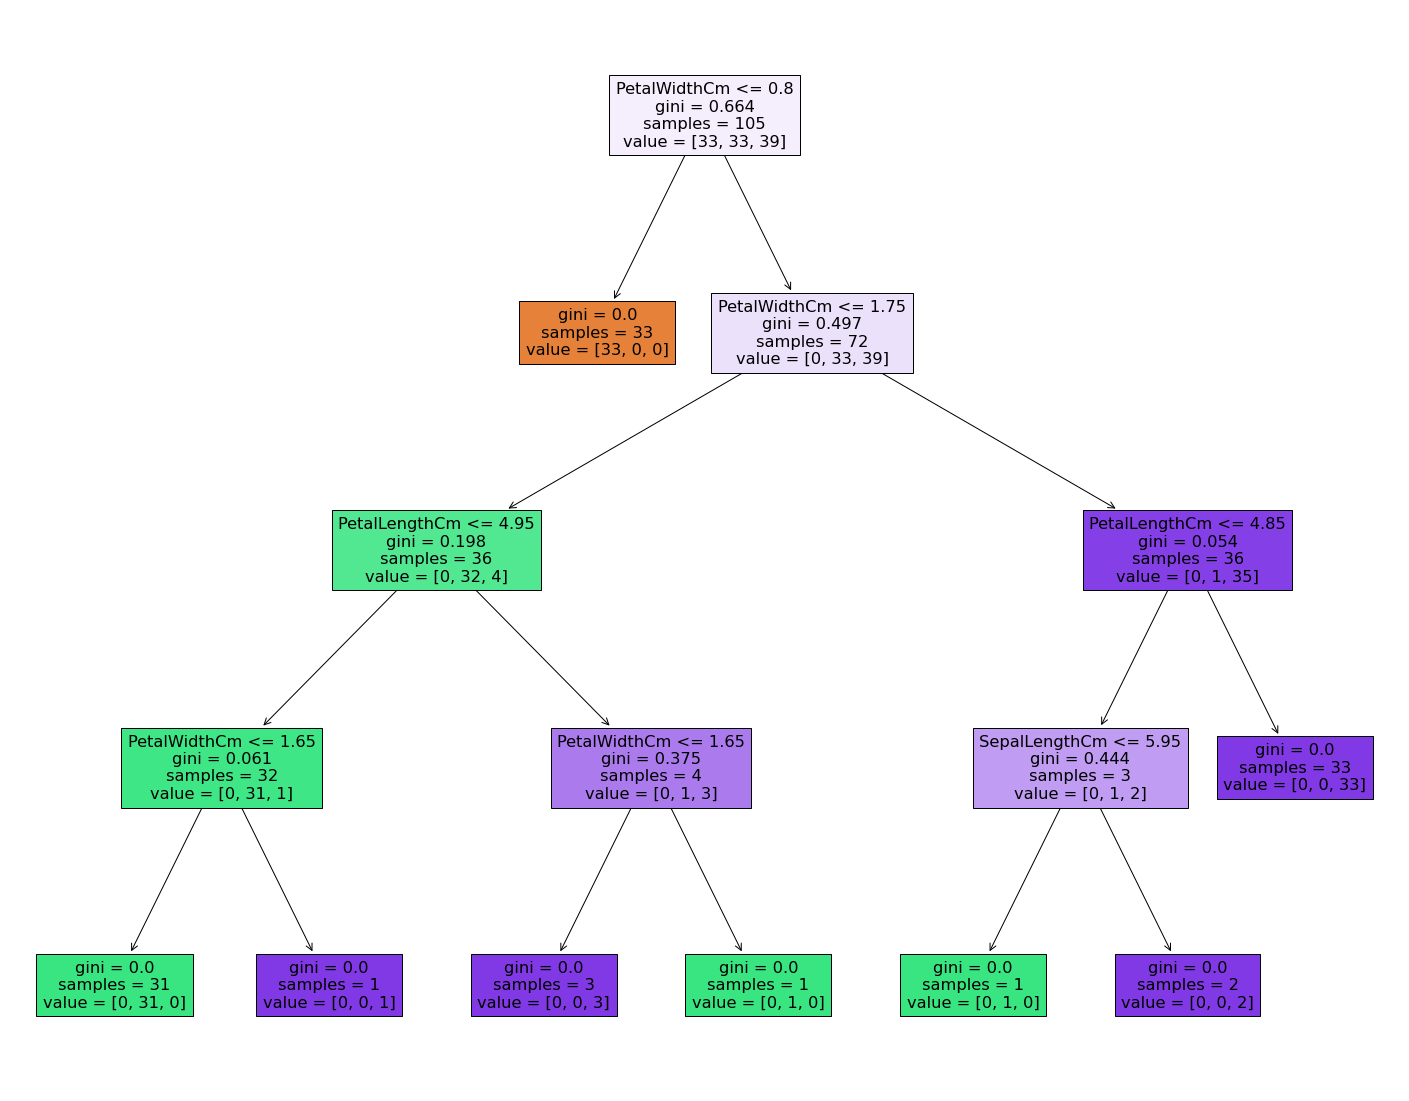

In [32]:
fig = plt.figure(figsize = (25,20))
tree.plot_tree(clf, feature_names = names, filled=True);
fig.savefig("decision_tree.png")

In [33]:
print(clf.tree_.max_depth)

4


In [34]:
y_pred = clf.predict(X_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


decision trees produced an accuracy score of .9555... not bad!

In [36]:
clf.score(X_test, y_test)

0.9777777777777777

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.94      0.97        17
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [38]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 11]])

Compare results of gini vs entropy

In [39]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9777777777777777

In [40]:
#how will different depths effect results? 
for i in range(1, 10):   
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    clf.fit(X_train, y_train)
    print(f"Depth {i} accuracy (Gini): {clf.score(X_test, y_test)}")

Depth 1 accuracy (Gini): 0.6222222222222222
Depth 2 accuracy (Gini): 0.9777777777777777
Depth 3 accuracy (Gini): 0.9777777777777777
Depth 4 accuracy (Gini): 0.9777777777777777
Depth 5 accuracy (Gini): 0.9777777777777777
Depth 6 accuracy (Gini): 0.9777777777777777
Depth 7 accuracy (Gini): 0.9777777777777777
Depth 8 accuracy (Gini): 0.9777777777777777
Depth 9 accuracy (Gini): 0.9777777777777777


There seems to be not real benefit for having a decision tree greater than depth 3 with this dataset and current model


In [41]:
#how about if we use entropy instead of gini impurity?
#how will different depths effect results? 
for i in range(1, 10):   
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    clf.fit(X_train, y_train)
    print(f"Depth {i} accuracy (Entropy): {clf.score(X_test, y_test)}")

Depth 1 accuracy (Entropy): 0.6222222222222222
Depth 2 accuracy (Entropy): 0.9777777777777777
Depth 3 accuracy (Entropy): 0.9777777777777777
Depth 4 accuracy (Entropy): 0.9777777777777777
Depth 5 accuracy (Entropy): 0.9777777777777777
Depth 6 accuracy (Entropy): 0.9777777777777777
Depth 7 accuracy (Entropy): 0.9777777777777777
Depth 8 accuracy (Entropy): 0.9777777777777777
Depth 9 accuracy (Entropy): 0.9777777777777777


In [42]:
f1_score(y_test, y_pred, average = 'weighted')

0.977924169228517

no difference between the metrics

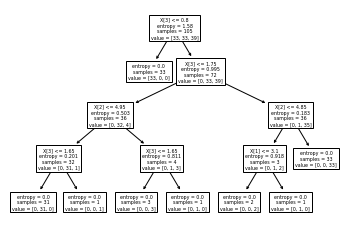

In [43]:
tree.plot_tree(clf);

### K-Nearest Neighbor

Notes: Based on the various plots I explored before, I think K-Nearest neighbor will be actually pretty effective, especially when being trained on the petal measurements since all the species are distinctly clustered

If we revisit one of my earlier scatter plots, you can see that the petal lengths have little no overlap, where as with the sepal lengths one species can easily be separated but is not the case with the other two.

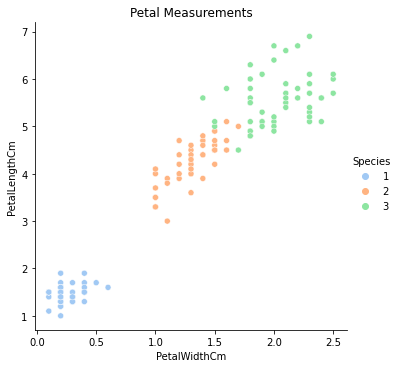

In [44]:
sns.relplot(x='PetalWidthCm', y='PetalLengthCm', hue = 'Species', data = iris, palette = 'pastel').set(title="Petal Measurements")

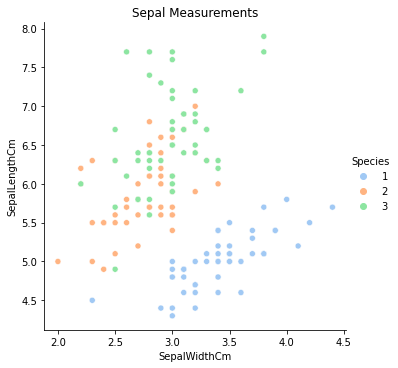

In [45]:
sns.relplot(x='SepalWidthCm', y='SepalLengthCm', hue = 'Species', data = iris, palette = 'pastel').set(title="Sepal Measurements")

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, normalize

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
knn.score(X_test, y_test)

/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/Classification/project2/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9777777777777777

scores .97 before normalization

In [49]:
knn

KNeighborsClassifier(n_neighbors=3)

In [50]:
#testing different number of neighbors
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(f"{i}: {knn.score(X_test, y_test)}")

1: 0.9777777777777777
2: 0.9777777777777777
3: 0.9777777777777777
4: 0.9777777777777777
5: 0.9777777777777777
6: 0.9777777777777777
7: 0.9777777777777777
8: 0.9777777777777777
9: 0.9777777777777777
10: 0.9777777777777777
11: 0.9777777777777777
12: 0.9777777777777777
13: 0.9777777777777777
14: 0.9777777777777777
15: 0.9555555555555556
16: 0.9777777777777777
17: 0.9555555555555556
18: 0.9777777777777777
19: 0.9555555555555556


/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/Classification/project2/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/Classification/project2/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/Classification/project2/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/Classification/project2/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted 

In [51]:
sc = StandardScaler()
sc.fit_transform(X)
X_scaled = sc.transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3)
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train_scaled)

X_norm = normalize(X)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm, y, test_size=0.3)
knn_norm = KNeighborsClassifier(n_neighbors=3)
knn_norm.fit(X_train_n, y_train_n)

print(f"Standardized Score: {knn_scaled.score(X_test_scaled, y_test_scaled)}")
print(f"Normalized Score: {knn_norm.score(X_test_n, y_test_n)}")

Standardized Score: 0.9111111111111111
Normalized Score: 0.9111111111111111


There is not notable difference between the types of scaling.

In [52]:
#testing different number of neighbors while standardized
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train_scaled)
    print(f"(Standardized) Neighbors: {i} Score: {knn.score(X_test_scaled, y_test_scaled)}")
    
#testing different number of neighbors while normalized
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_n, y_train_n)
    print(f"(Normalized) Neighbors: {i} Score: {knn.score(X_test_n, y_test_n)}")

(Standardized) Neighbors: 1 Score: 0.9333333333333333
(Standardized) Neighbors: 2 Score: 0.9333333333333333
(Standardized) Neighbors: 3 Score: 0.9111111111111111
(Standardized) Neighbors: 4 Score: 0.9111111111111111
(Standardized) Neighbors: 5 Score: 0.9555555555555556
(Standardized) Neighbors: 6 Score: 0.9333333333333333
(Standardized) Neighbors: 7 Score: 0.9333333333333333
(Standardized) Neighbors: 8 Score: 0.9111111111111111
(Standardized) Neighbors: 9 Score: 0.9111111111111111
(Standardized) Neighbors: 10 Score: 0.9111111111111111
(Standardized) Neighbors: 11 Score: 0.9111111111111111
(Standardized) Neighbors: 12 Score: 0.9111111111111111
(Standardized) Neighbors: 13 Score: 0.9333333333333333
(Standardized) Neighbors: 14 Score: 0.9333333333333333
(Standardized) Neighbors: 15 Score: 0.9333333333333333
(Standardized) Neighbors: 16 Score: 0.9333333333333333
(Standardized) Neighbors: 17 Score: 0.9333333333333333
(Standardized) Neighbors: 18 Score: 0.9555555555555556
(Standardized) Neig

I noticed that the accuracy score varies depending on how the data is randomly split. 

### Naive Bayes (Gaussian)
Naive Bayes should be pretty successful since Naive Bayes performs well with relatively small datasets. Also I since we are implementing the gaussian algorithm, it assumes that the data is normal distribution which is generally the case for naturally occuring things like height of people or in this case, sepal/petal lengths.

#### Normal Distribution

![Normal Distribution](normaldist.png)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

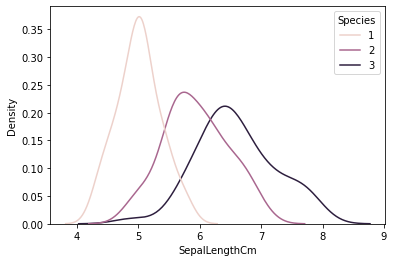

In [55]:
sns.kdeplot(data=iris, x='SepalLengthCm', hue = 'Species')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

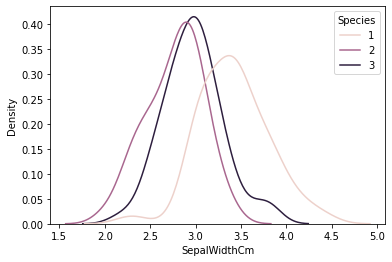

In [56]:
sns.kdeplot(data=iris, x='SepalWidthCm', hue = 'Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

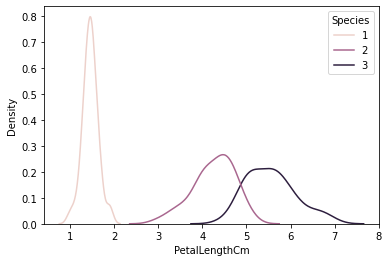

In [57]:
sns.kdeplot(data = iris, x = 'PetalLengthCm', hue = 'Species')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

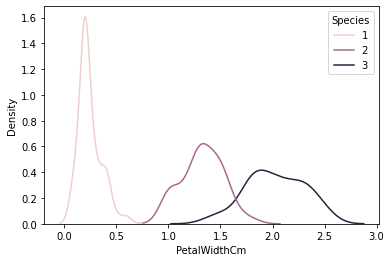

In [58]:
sns.kdeplot(data = iris, x = 'PetalWidthCm', hue = 'Species')

Of course they are not exactly normally distributed but it is relatively close, especially considering the dataset is pretty small.

In [59]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
gnb.score(X_test, y_test)

0.9555555555555556

In [62]:
y_pred = gnb.predict(X_test)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [67]:
#Let's train on only the sepal measurements and see how Naive Bayes performs with some overlap
gnb_sepal = GaussianNB()
gnb.fit(X_sepal_train, y_sepal_train)
gnb.score(X_sepal_test, y_sepal_test)

0.8444444444444444

In [68]:
#Let's train on only the sepal measurements and see how Naive Bayes performs with some overlap
gnb_petal = GaussianNB()
gnb.fit(X_petal_train, y_petal_train)
gnb.score(X_petal_test, y_petal_test)

0.9333333333333333

### Support Vector Machines
I believe a SVM model will perform well since for the same reasons KNN would, there is clear distinction in some of the features. 

I wonder if we drop the petal measurements then the model would perform worse since there is more overlap in the sepal than in the petal.

In [104]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [72]:
svmc = svm.SVC()
svmc.fit(X_train, y_train)

SVC()

In [73]:
svmc.score(X_test, y_test)

0.9777777777777777

In [74]:
svmc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [123]:
#testing polynomial kernel
svm_poly = svm.SVC(kernel = 'linear')
svm_poly.fit(X_train, y_train)
svm_poly.score(X_test, y_test)

0.9777777777777777

In [119]:
#sepal only polynomial linear
svm_sepal_l = LinearSVC(max_iter = 5000, multi_class = 'ovr')
svm_sepal_l.fit(X_sepal_train, y_sepal_train)
svm_sepal_l.score(X_sepal_test, y_sepal_test)

0.8222222222222222

In [122]:
#sepal only polynomial polynomial
svm_sepal = svm.SVC(kernel = 'poly')
svm_sepal.fit(X_sepal_train, y_sepal_train)
svm_sepal.score(X_sepal_test, y_sepal_test)

0.8444444444444444

Since the sepal values are overlapping more, our model did not perform as well

### Logistic Regression

I will not be implementing logistic regression since my dependent variable is not binary and I do not have a large sample size. 

### Random Forest